In [1]:
from google.colab import files
uploaded = files.upload()

Saving WYA.csv to WYA.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import data #

data = pd.read_csv("WYA.csv")
print(data)

# Summarize data #

data.head(10)
data.tail(10)

    Year  Yield(kg/ha)  Temperature (°C)
0   2000        2490.7             0.582
1   2001        2325.4             0.658
2   2002        2262.1             0.900
3   2003        2387.8             0.401
4   2004        2373.3             0.941
5   2005        2585.8             0.127
6   2006        2518.6             0.973
7   2007        2715.6             0.598
8   2008        2451.4             0.314
9   2009        2656.8             0.960
10  2010        2552.8             1.219
11  2011        2832.8             0.769
12  2012        2713.8             0.205
13  2013        2795.7             0.748
14  2014        2824.1             0.340
15  2015        2725.6             0.526
16  2016        2779.0             1.156
17  2017        2972.9             1.222
18  2018        2850.5             1.311
19  2019        2805.9             0.506
20  2020        2867.5             0.342
21  2021        2995.6             1.026
22  2022        2919.6             1.265
23  2023        

,Year,Yield(kg/ha),Temperature (°C)
14,2014,2824.1,0.340
15,2015,2725.6,0.526
16,2016,2779.0,1.156
17,2017,2972.9,1.222
18,2018,2850.5,1.311
19,2019,2805.9,0.506
20,2020,2867.5,0.342
21,2021,2995.6,1.026
22,2022,2919.6,1.265
23,2023,3117.6,1.046


In [4]:
data.describe()

,Year,Yield(kg/ha),Temperature (°C)
count,24.000000,24.000000,24.000000
mean,2011.500000,2688.370833,0.755625
std,7.071068,228.800466,0.361450
min,2000.000000,2262.100000,0.127000
25%,2005.750000,2511.625000,0.479750
50%,2011.500000,2720.600000,0.758500
75%,2017.250000,2837.225000,1.031000
max,2023.000000,3117.600000,1.311000


* **Yield (kg/ha):** The mean
annual yield was found to be 2688.37 kg/ha, with a standard deviation of 228.80 kg/ha, indicating moderate variability around the mean. The lowest recorded yield was 2262.10 kg/ha, while the highest reached 3117.60 kg/ha. The interquartile range (IQR), spanning from 2511.62 kg/ha (25th percentile) to 2837.22 kg/ha (75th percentile), encompasses the central 50% of the yield data.

* **Temperature (°C):** The average change in temperature was 0.76 °C, with a standard deviation of 0.36 °C, suggesting a relatively consistent trend in temperature changes. The minimum observed temperature change was 0.13 °C, and the maximum was 1.31 °C. The central distribution of temperature changes, defined by the IQR, ranges from 0.48 °C to 1.03 °C.

* **Year:** The dataset spans from the year 2000 to 2023, with a mean year of 2011.5 and a standard deviation of 7.07 years, reflecting the temporal coverage of the data.





In [5]:
data.info()
int(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              24 non-null     int64  
 1   Yield(kg/ha)      24 non-null     float64
 2   Temperature (°C)  24 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


0

# **Trend Analysis**




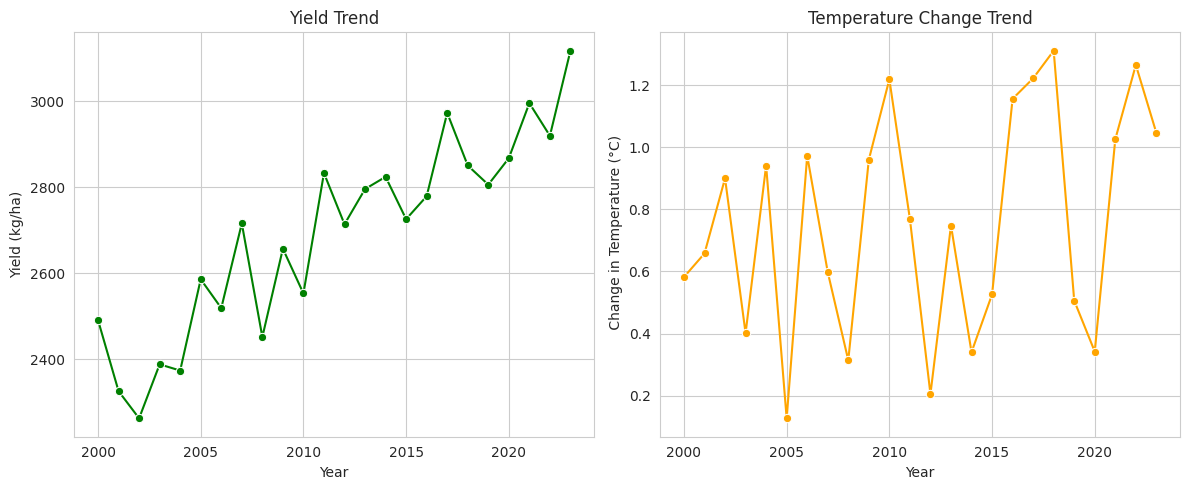

In [6]:
plt.figure(figsize =(12,5))
sns.set_style("whitegrid")

plt.subplot(1,2,1)
sns.lineplot(data=data , x= "Year" , y= "Yield(kg/ha)", marker = "o" , color = "green")
plt.title("Yield Trend")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")

plt.subplot(1,2,2)
sns.lineplot(data=data , x= "Year" , y= "Temperature (°C)", marker = "o" , color = "orange")
plt.title("Temperature Change Trend")
plt.xlabel("Year")
plt.ylabel(" Change in Temperature (°C)")

plt.tight_layout()
plt.show()

*  **Yield Trend:** The plot reveals an overall upward trajectory in wheat yield over the two-decade span. While minor inter-annual variability is present, the general trend indicates an increase in agricultural productivity. A notable peak in yield is observed around the year 2020, followed by continued high values.

*  **Temperature Change Trend:** The visualization suggests a more volatile pattern compared to the yield trend. The temperature changes exhibit considerable year-to-year fluctuations, characterized by periods of both increase and decrease. A marked decrease in temperature change is evident towards the end of the analyzed period, specifically around 2023, contributing to the abrupt nature of its overall trend.



# **Anomaly Trend Analysis**

In [7]:
yield_mean = data["Yield(kg/ha)"].mean()
temp_mean = data["Temperature (°C)"].mean()

Yield_anomaly = data["Yield(kg/ha)"] - yield_mean
Temp_anomaly = data["Temperature (°C)"] - temp_mean

data["Yield_anomaly"] = Yield_anomaly
data["Temp_anomaly"] = Temp_anomaly
print(data)

    Year  Yield(kg/ha)  Temperature (°C)  Yield_anomaly  Temp_anomaly
0   2000        2490.7             0.582    -197.670833     -0.173625
1   2001        2325.4             0.658    -362.970833     -0.097625
2   2002        2262.1             0.900    -426.270833      0.144375
3   2003        2387.8             0.401    -300.570833     -0.354625
4   2004        2373.3             0.941    -315.070833      0.185375
5   2005        2585.8             0.127    -102.570833     -0.628625
6   2006        2518.6             0.973    -169.770833      0.217375
7   2007        2715.6             0.598      27.229167     -0.157625
8   2008        2451.4             0.314    -236.970833     -0.441625
9   2009        2656.8             0.960     -31.570833      0.204375
10  2010        2552.8             1.219    -135.570833      0.463375
11  2011        2832.8             0.769     144.429167      0.013375
12  2012        2713.8             0.205      25.429167     -0.550625
13  2013        2795

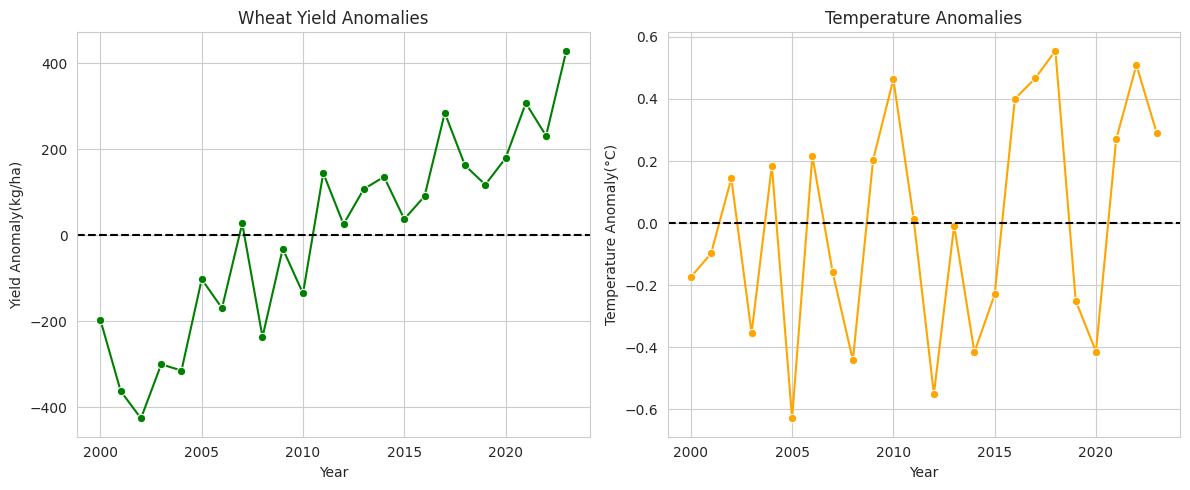

In [8]:
plt.figure(figsize =(12,5))
sns.set_style("whitegrid")

plt.subplot(1,2,1)
sns.lineplot(data=data , x= "Year" , y= "Yield_anomaly", marker = "o" , color = "green")
plt.axhline(0, color="black", linestyle="--")  # zero line
plt.title("Wheat Yield Anomalies")
plt.xlabel("Year")
plt.ylabel("Yield Anomaly(kg/ha)")

plt.subplot(1,2,2)
sns.lineplot(data=data , x= "Year" , y= "Temp_anomaly", marker = "o" , color = "orange")
plt.axhline(0, color="black", linestyle="--")  # zero line
plt.title("Temperature Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly(°C)")

plt.tight_layout()
plt.show()

* **Wheat Yield Anomalies:** Presents the deviation of annual yield from the overall mean yield. This plot elucidates periods where yield was significantly above or below its historical average. *Positive anomalies* indicate years of higher-than-average productivity, while *negative anomalies* denote years with yields below the average with an overall upward trend.

* **Temperature Anomalies:** Illustrates the annual deviation of temperature changes from their mean. Similar to yield anomalies, positive values signify warmer-than-average conditions (or larger increases in temperature), whereas negative values indicate cooler-than-average conditions (or smaller increases/decreases).

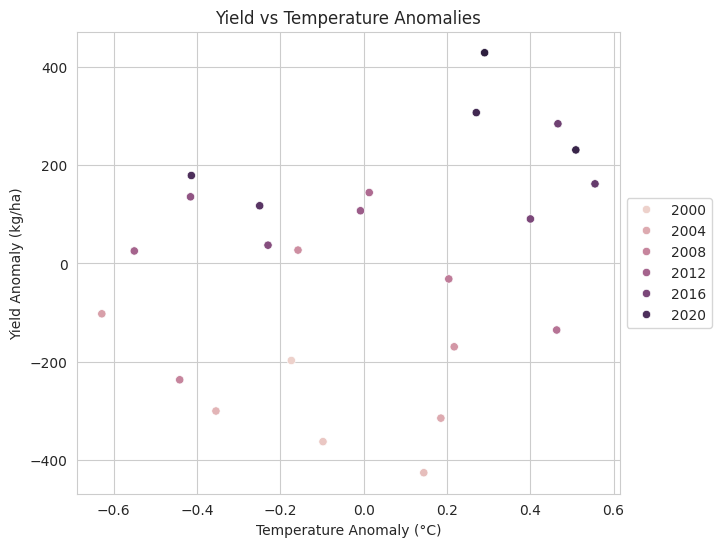

In [10]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=data, x="Temp_anomaly", y="Yield_anomaly", hue = "Year")
plt.xlabel("Temperature Anomaly (°C)")
plt.ylabel("Yield Anomaly (kg/ha)")
plt.title("Yield vs Temperature Anomalies")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

* **Early Period (2000-2006):**
During these initial years, most data points show negative yield anomalies, indicating below-average wheat production. Temperature anomalies in this period were mixed.

* **Transition and Later Period (2007-2023):**
A general shift towards more frequent positive yield anomalies is evident from approximately 2007 onwards, with Yield_anomaly rarely falling below the zero line. This period, however, still exhibits considerable fluctuation in temperature anomalies.
* In a contrasting scenario, 2020 showed a substantial positive yield anomaly of approximately 179 kg/ha, even though it was associated with a negative temperature anomaly of about -0.41°C. This highlights instances where above-average yields can occur in cooler-than-average years, suggesting the influence of other environmental or agricultural factors.




# **Correlation Analysis**

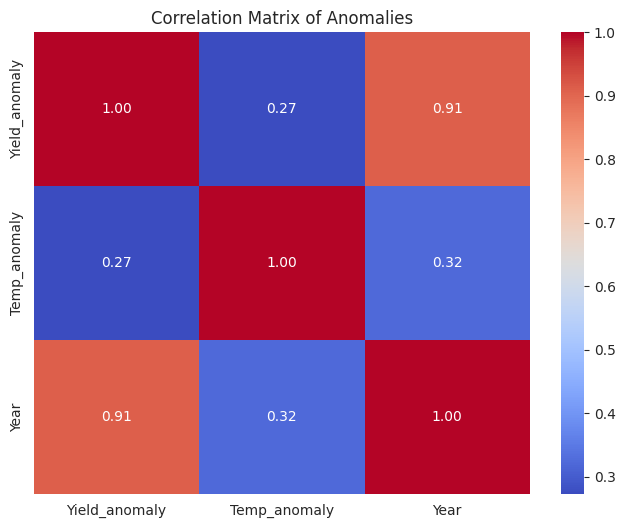

In [11]:
corr_matrix = data[["Yield_anomaly", "Temp_anomaly" , "Year"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Anomalies")
plt.show()



*  **Yield Anomaly and Year:** A strong positive correlation of 0.91 is observed between Yield_anomaly and Year. This indicates that as years progress, there is a substantial tendency for wheat yield anomalies to increase, suggesting an overarching positive trend in yield performance relative to its historical average over time.

*  **Yield Anomaly and Temperature Anomaly:** A weak positive correlation of 0.27 exists between Yield_anomaly and Temp_anomaly. This suggests a marginal tendency for higher yield anomalies to coincide with higher temperature anomalies. The relationship is not pronounced, implying that while some warmer periods might align with better yields, temperature anomaly alone is not a primary driver of yield anomaly, or the relationship is non-linear.

* **Temperature Anomaly and Year:** A weak positive correlation of 0.32 is found between Temp_anomaly and Year. This indicates a slight tendency for temperature anomalies to increase over the years, though this relationship is not strong and suggests that year-to-year temperature fluctuations are more dominant than a consistent long-term warming trend in terms of anomalies.

* In summary, the analysis highlights that Year has a very strong positive association with Yield_anomaly, while the relationships involving Temp_anomaly are comparatively weaker, suggesting other factors may play a more significant role in influencing temperature deviations and their impact on yield.